# Introduction to Python and Natural Language Technologies

__Laboratory 4, Numpy__

__March 4, 2021__

__Gábor Borbély, Judit Ács__

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Numpy basic exercises

Use vectorization and avoid for loops in all exercises. Implement each exercise as a single function.

## 1.1 Implement standardization for 2D arrays.

Standardization is defined as:

\begin{equation*}
X_{std} = \frac{X - \mu}{\sigma},
\end{equation*}

where $\mu$ is the mean of each row and $\rho$ is the standard deviation of each row.

In [2]:
'''
A = np.array([[1, 2], [3, 4], [5, 6]])
A
#array([[1, 2],
#       [3, 4],
#       [5, 6]])
#A.sum(axis=2) # ERROR: axis 2 is out of bounds for array of dimension 2
              # Because the A is 2D => it has only 2 axes, along column axis has index 0 (axis=0),
              # while along row axis has index 1 (axis=1).
A.sum(axis=1) # array([ 3,  7, 11])
B=np.array([[1, 2], [3, 4], [5, 6]])
C=A-B # C: array([[0, 0],
      #          [0, 0],
      #          [0, 0]])
D=np.hstack((C,C))
D # array([[0, 0, 0, 0],
  #     [0, 0, 0, 0],
  #     [0, 0, 0, 0]])

M=A.sum(axis=1).reshape(3,1)
'''
def standardize(X):
    A = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #reference: Standardization of an numpy array Stackoverflow
    return A
X_std=standardize(np.array([[1, 2], [2, 3], [1, 2]]))
X_std


array([[-0.70710678, -0.70710678],
       [ 1.41421356,  1.41421356],
       [-0.70710678, -0.70710678]])

In [3]:
X_std = standardize(np.array([[1, 2], [2, 3], [1, 2]]))

answer = np.array(
    [[-0.70710678, -0.70710678],
     [ 1.41421356,  1.41421356],
     [-0.70710678, -0.70710678]])
assert np.allclose(X_std, answer)

## 1.2 Implement normalization for 2D arrays.

Normalization is defined as:

\begin{equation*}
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
\end{equation*}

In [4]:
'''
X = np.arange(6).reshape(2, 3)
X
X[1, 2] = -5
X
# find min or max within a dimesion: reference: https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html
'''

def normalize(X):
    A=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
    return A
    
                    
X = np.arange(6).reshape(2, 3)
#X
X[1, 2] = -5
T=normalize(X)
T


array([[0., 0., 1.],
       [1., 1., 0.]])

In [5]:
answer = np.array(
    [[0., 0., 1.],
     [1., 1., 0.]]
)
X_norm = normalize(X)
assert np.allclose(X_norm, answer)

## 1.3 Implement the softmax function.

Softmax is defined as for each row:

$$
x_i \mapsto \frac{\exp(x_i)}{\sum_{j=1}^n \exp(x_j)},
$$

in other words, softmax maps every row into a probability distribution (all elements are nonnegative and their sum is 1).

In [6]:
def softmax(X):
    # compute softmax along the last dimension
    # YOUR CODE HERE
    
    exp=np.exp(X)
    #print(exp)
    denum= exp.sum(axis=1)
    #print(denum)
    denum=denum.reshape(len(X[:,0]),1)
    #print(denum)
    T=exp/ denum.reshape(len(X[:,0]),1)
    #print(T)
    return T
X = np.arange(12).reshape(3, -1)
softmax(X)

array([[0.0320586 , 0.08714432, 0.23688282, 0.64391426],
       [0.0320586 , 0.08714432, 0.23688282, 0.64391426],
       [0.0320586 , 0.08714432, 0.23688282, 0.64391426]])

In [7]:
answer = np.array(
    [[0.0320586 , 0.08714432, 0.23688282, 0.64391426],
     [0.0320586 , 0.08714432, 0.23688282, 0.64391426],
     [0.0320586 , 0.08714432, 0.23688282, 0.64391426]]
) 
X = np.arange(12).reshape(3, -1)

assert np.allclose(softmax(X), answer)

X = np.array([[100, 100], [-100, -100]])
assert np.allclose(softmax(X), np.array([[0.5, 0.5], [0.5, 0.5]]))

In [8]:
X = np.array([[0, 1, 2],
              [2, 1, 2]])

answer = np.array([[0.09003057, 0.24472847, 0.66524096],
                   [0.4223188 , 0.1553624 , 0.4223188 ]])

assert np.allclose(softmax(X), answer)

# 2. Vectorization

Rewrite the following examples into vectorized solutions (no for loops and list comprehensions).

## 2.1 Row-wise Euclidean norm

Write a function which has one parameter, a 2D array and it returns a vector of row-wise Euclidean norms of the input. Use `numpy` operations and vectorization, avoid `for` loops. The solution below is a _bad_ solution.

In [9]:
def rowwise_norm(X):
    def my_dot(x, y):
        result = 0.0
        for i in range(len(x)):
            result += x[i] * y[i]
        return result
    return np.array([np.sqrt(my_dot(x, x)) for x in X])

X = np.arange(5)[:, None]*np.ones((5, 3));
print(X)
print(rowwise_norm(X))
print(rowwise_norm([[1], [-1], [1], [-1]]))

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[0.         1.73205081 3.46410162 5.19615242 6.92820323]
[1. 1. 1. 1.]


Your vectorized solution goes here:

In [10]:

def rowwise_norm(X):
   # if type(X) != ndarray:
    X=np.array(X) # in case X is not defined by np.array (means X is a list type not np.ndarray type)
    Square = X * X
    #print(Square)
    Row_wise_norm= Square.sum(axis=1)**0.5
    #print(Row_wise_norm)
    return Row_wise_norm
X = np.arange(5)[:, None] * np.ones((5, 3));

print(rowwise_norm(X))


[0.         1.73205081 3.46410162 5.19615242 6.92820323]


In [11]:
X = np.arange(5)[:, None] * np.ones((5, 3));
print(X)
print(rowwise_norm(X))

assert np.allclose(rowwise_norm(X), np.array([0., 1.73205081, 3.46410162, 5.19615242, 6.92820323]))
assert np.allclose(rowwise_norm([[1], [-1], [1], [-1]]), np.ones(4))

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[0.         1.73205081 3.46410162 5.19615242 6.92820323]


## 2.2 Chessboard

Write a function which has one parameter, a positive integer $n$, and returns an $n\times n$ array of $\pm1$ values like a chessboard: $M_{i,j} = (-1)^{i+j}$.

In [12]:
def chessboard(n):
    return np.array([[(-1)**(i + j) for j in range(n)] for i in range(n)])

chessboard(5)

array([[ 1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1]])

Your vectorized solution:

In [13]:
def chessboard(n):
    # YOUR CODE HERE
    Board= -np.ones((n,n))
    #print(Board)
    Exp=np.arange(0,n*n).reshape(n,n)
    #print(Exp)
    Board = Board ** Exp
    #print(Board)
    return Board

chessboard(3)

array([[ 1., -1.,  1.],
       [-1.,  1., -1.],
       [ 1., -1.,  1.]])

In [14]:
board5 = np.array([[ 1, -1,  1, -1,  1],
                   [-1,  1, -1,  1, -1],
                   [ 1, -1,  1, -1,  1],
                   [-1,  1, -1,  1, -1],
                   [ 1, -1,  1, -1,  1]])
assert np.allclose(chessboard(5), board5)
assert np.allclose(chessboard(0), np.array([]))

# 3. Broadcast quiz

Do the following operations work and if so, what is the shape of the resulting array?

Can you broadcast these arrays such that they can be added? What will be the shape of the result?

Try to figure it out before evaluating the cells.

In [15]:
np.ones(3) + np.ones((3, 3)) # it works because np.ones(3) = np.ones(None, 3) or np.ones(-1,3) or np.ones(1,3)
                             # '3' in np.ones(3) is always (by default) the parameter for the last dimension.
                             # result shape:(3,3)   

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [16]:
np.ones(3) + np.ones((4, 3)) # it works because np.ones(3) = np.ones(None, 3) or np.ones(-1,3)
                             # result shape (4,3)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [17]:
# np.ones(3) + np.ones((3, 4)) # it doesn't because np.ones(3) = np.ones(None, 3) or np.ones(-1,3)

np.ones((3,1))+ np.ones((3, 4)) # result shape (3,4)

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [18]:
np.ones(3)[:, None] + np.ones((3, 4)) # it works because with the post index [:,None] of np.ones(3)
                                      # it forces 3 to be the parameter for the first dimension instead of the last dimension.
                                      # the result shape (3,4)  

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [19]:
np.ones((1, 2, 3)) + np.ones((1, 3))[:, None, :] # it works because with [:,None,:] it forces the param '1' in np.ones(1,3)
                                                 # to be the param for first dimension and the param '3' in np.ones (1,3)
                                                 # to be the param for last dimension.   
                                                 # the result shape (1,2,3)   

array([[[2., 2., 2.],
        [2., 2., 2.]]])

In [20]:
np.ones((1, 2, 3)) + np.ones((1, 3)) # it works, the result shape (1,2,3)

array([[[2., 2., 2.],
        [2., 2., 2.]]])

In [21]:
# np.ones((4, 20, 3)) + np.ones((5, 3)) # it doesn't work
np.ones((1,4, 20, 3)) + np.ones((5,1,1, 3)) # the result shape (5,4,20,3) 

array([[[[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]],


       [[[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
     

# 4. Numpy advanced exercises

## 4.1 Blockmatrix

Write a function named __`blockmatrix`__ that produces the following (block) matrix:
$$
\left(\begin{array}{ccc|ccc}
 1 & \cdots & 1& 0 & \cdots & 0 \\
 \vdots & & \vdots  & \vdots & & \vdots \\
  1& \cdots & 1 & 0 & \cdots & 0 \\\hline
  0 & \cdots & 0 & 1 & \cdots & 1 \\
  \vdots & & \vdots & \vdots & & \vdots \\
  0 & \cdots & 0 & 1 & \cdots & 1
\end{array}\right)
$$
The function should have 2 positive integer parameters, the size of the first square block and the size of the last square block. The other two blocks should have the appropriate size (may be rectangle).
Both the first and last blocks are constant $1$ matrices.
Return the resulted matrix.

Use matrix initializers: `ones`, `zeros` and concatenation.

In [22]:
def blockmatrix(n, m):
    # YOUR CODE HERE
    TLBlock= np.ones((n,n))
    #print(TLBlock)
    BRBlock = np.ones((m,m))
    #print(BRBlock)
    TRBlock=np.zeros((n,m))
    #print(TRBlock)
    BLBlock=np.zeros((m,n))
    #print(BLBlock)
    TBlock= np.concatenate((TLBlock, TRBlock), axis=1)
    #print(TBlock)
    BBlock=np.concatenate((BLBlock,BRBlock),axis=1)
    #print(BBlock)
    #print(np.concatenate((TBlock,BBlock), axis=0))
    return np.concatenate((TBlock,BBlock), axis=0)

blockmatrix(2, 5)

array([[1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.]])

In [23]:
block_mtx_3_2 = np.array([[1., 1., 1., 0., 0.],
                          [1., 1., 1., 0., 0.],
                          [1., 1., 1., 0., 0.],
                          [0., 0., 0., 1., 1.],
                          [0., 0., 0., 1., 1.]])
assert np.allclose(blockmatrix(3, 2), block_mtx_3_2)
assert np.allclose(blockmatrix(0, 0), np.array([]))
assert np.allclose(blockmatrix(1, 1), np.eye(2))

# ================ PASSING LEVEL ====================

## 4.2 Blockmatrix from arbitrary square matrices

Write a blockmatrix function that takes any number of square matrices and returns a blockmatrix with these matrices in the diagonal. You can use one for loop for this solution (list comprehensions count as a for loop).

In [24]:
def any_blockmatrix(*matrices):
    # YOUR CODE HERE
    
    for x in range(0, len(matrices)):
    #print(len(matrices[0][:,0])) # number of rows in a matrix
    #print(len(matrices[0][0,:])) # number of columns in a matrix
        if x==0:
            Block=matrices[0]
        else:
            #print("second")
            #print(x)
            TLBlock= Block
            TRBlock= np.zeros( (len(Block[:,0]), len(matrices[x][0,:])) )
            BLBlock= np.zeros( (len(matrices[x][:,0]), len(Block[0,:])) )
            BRBlock= matrices[x]
            TBlock= np.concatenate((TLBlock, TRBlock), axis=1)
            BBlock= np.concatenate((BLBlock, BRBlock), axis=1)
            Block= np.concatenate((TBlock, BBlock), axis=0)
    return Block
    
A = np.arange(9).reshape(3, 3)
B = np.diag((2, 3))
any_blockmatrix(A, B, A, B)
#B
#any_blockmatrix(np.ones((2, 2)), 3 * np.ones((3, 3)))


array([[0., 1., 2., 0., 0., 0., 0., 0., 0., 0.],
       [3., 4., 5., 0., 0., 0., 0., 0., 0., 0.],
       [6., 7., 8., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 2., 0., 0.],
       [0., 0., 0., 0., 0., 3., 4., 5., 0., 0.],
       [0., 0., 0., 0., 0., 6., 7., 8., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])

In [25]:
block_mtx = np.array([[0., 1., 2., 0., 0., 0., 0., 0., 0., 0.],
                      [3., 4., 5., 0., 0., 0., 0., 0., 0., 0.],
                      [6., 7., 8., 0., 0., 0., 0., 0., 0., 0.],
                      [0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
                      [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
                      [0., 0., 0., 0., 0., 0., 1., 2., 0., 0.],
                      [0., 0., 0., 0., 0., 3., 4., 5., 0., 0.],
                      [0., 0., 0., 0., 0., 6., 7., 8., 0., 0.],
                      [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
                      [0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]])
A = np.arange(9).reshape(3, 3)
B = np.diag((2, 3))
assert np.allclose(any_blockmatrix(A, B, A, B), block_mtx)

block_mtx2 = np.array([[1., 1., 0., 0., 0.],
                       [1., 1., 0., 0., 0.],
                       [0., 0., 3., 3., 3.],
                       [0., 0., 3., 3., 3.],
                       [0., 0., 3., 3., 3.]])
assert np.allclose(any_blockmatrix(np.ones((2, 2)), 3 * np.ones((3, 3))), block_mtx2)

## 4.3 Derivative

Write a function which numerically derivates a $\mathbb{R}\mapsto\mathbb{R}$ function. Use the forward finite difference.

The input is a 1D array of function values, and optionally a 1D vector of abscissa values. If not provided then the abscissa values are unit steps.

The result is a 1D array with the length of one less than the input array.

Rewrite the following solution without for loops.

In [26]:
def derivate(f, x=None):
    if x is None:
        x = np.arange(len(f))
    return np.array([(f[i+1] - f[i]) / (x[i+1] - x[i]) for i in range(len(x) - 1)])

derivate(np.arange(10)**2)

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17.])

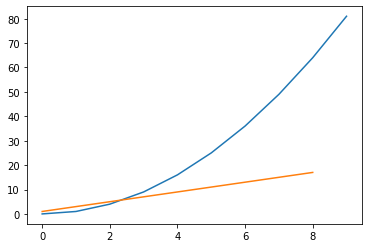

In [27]:
x = np.arange(10)
plt.plot(x, x**2)
plt.plot(x[:-1], derivate(x**2, x))

Your vectorized solution:

In [28]:
def derivate(f, x=None):
    # YOUR CODE HERE
    if x is None:
        x = np.arange(len(f))
    f_forward=np.delete(f,0)
    #print(f_forward)
    f_behind= np.delete(f,len(f)-1 ) # reference: https://stackoverflow.com/questions/10996140/how-to-remove-specific-elements-in-a-numpy-array?fbclid=IwAR3wXjDrn6xf_-0ktM5ZafnFH60JzWXZhHYi2aoGRtdPH7O8YJdslwU_Jy0
    y_dif=f_forward-f_behind
    
    #print(x)
    x_forward= np.delete(x,0)
    #print(x_forward)
    x_behind=np.delete(x,len(x)-1)
    #print(x)
    x_dif=x_forward-x_behind
    
    deriv=y_dif / x_dif
    #print(deriv)
    
    return deriv
derivate(np.arange(10)**2)

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17.])

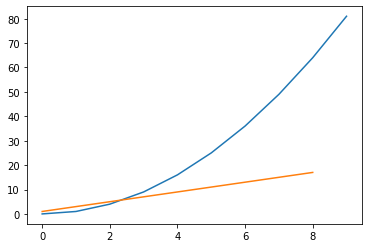

In [29]:
x = np.arange(10)
plt.plot(x, x**2)
plt.plot(x[:-1], derivate(x**2, x))

## 4.4 Birthday problem

In probability theory, the birthday problem or birthday paradox concerns the probability that, in a set of n randomly chosen people, some pair of them will have the same birthday. By the pigeonhole principle, the probability reaches 100% when the number of people reaches 367 (since there are only 366 possible birthdays, including February 29). However, 99.9% probability is reached with just 70 people, and 50% probability with 23 people. These conclusions are based on the assumption that each day of the year (excluding February 29) is equally probable for a birthday. -- [Wikipedia](https://en.wikipedia.org/wiki/Birthday_problem)

Write a function that simulates this problem for variable $n$. Your function should take $n$ and an experiment count as its parameter and sample experiment count times and return the ratio of "birthday collisions" (how many times there were at least two birthdays on the same day). You can ignore leap years and assume that every year has 365 days.

Run it for different $n$ values with at least 1000 experiments.

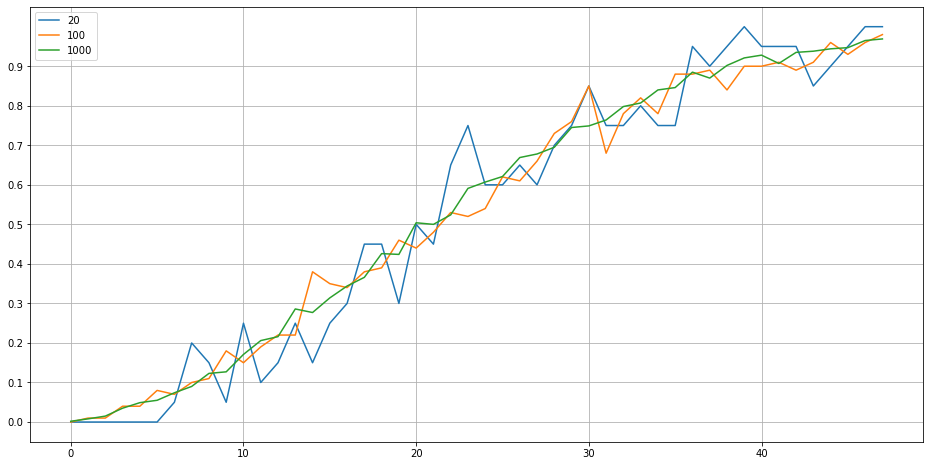

In [30]:
def simulate_birthday_problem(n, iter_no=1000):
    """Simulates the birthday problem for a group of N people
    Generates N birthdays with uniform probability and returns
    the proportion of iterations with birthday collisions.
    """
    # YOUR CODE HERE
    count=0;
    for i in range (0, iter_no):
        #np.random.choice(list('abcdef'), 10, p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])
        #np.random.choice(["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"], 10, replace=True)
        
        days=np.arange(1,366)
        samples=np.random.choice(days,n,replace=True)
        #print(days)
        
        # count the birth collision: (whether this iteration has birthday collision)
        uniq=np.unique(samples) # reference: https://www.w3resource.com/numpy/manipulation/unique.php?fbclid=IwAR3G4aGYMP9rgUYUvdHYCQUGQPvKNbD03AprL_14zp3r5QJXuNZVu4MUM6c
                                # to check the distinct birthdays in the samples
        if len(uniq) != len(samples): # there is collision
            count=count+1
    return count/iter_no

#simulate_birthday_problem(2,1)

max_n = 50
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_yticks(np.arange(0, 1.0, .1))
ax.grid(True)

# number of simulations to run
iter_nums = [20, 100, 1000]

for iter_no in iter_nums:
    x = []
    for n in range(2, max_n):
        x.append(simulate_birthday_problem(n, iter_no=iter_no))
    ax.plot(x)
    
ax.legend(iter_nums)

# notice that the plot becomes less noisy as we run more simulations

## 4.5 Horner's method

Implement the [Horner's method](https://en.wikipedia.org/wiki/Horner%27s_method#Description_of_the_algorithm) for evaluating polynomials. The first input is a 1D array of numbers, the coefficients, from the constant coefficient to the highest order coefficent. The second input is the variable $x$ to subsitute. The function should work for all type of variables: numbers, arrays; the output should be the same type array as the input, containing the elementwise polynomial values.

In [31]:
def horner(C, x):
    # YOUR CODE HERE
    x=np.array(x)
    t=x.shape
 
    s=np.zeros(t)
 
    for i in range (len(C)-1, -1, -1):
        #print(C[i])
        s=s*x + C[i]
        #print(s)
    return s

C = [2, 0, 1] # 2 + 0*x + 1*x^2
print(horner(C, 3)) # 2 + 3^2
print(horner(C, [3, 3]))

11.0
[11. 11.]


In [32]:
C = [2, 0, 1] # 2 + 0*x + 1*x^2
assert horner(C, 3) == 11
assert np.allclose(horner(C, [3, 3]), [11, 11])

# ================ EXTRA LEVEL ====================

# 5.1 K-means clustering

Implement the naive k-means algorithm for 2-dimensional data.

The naive version of k-means is explained [here](https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm_(naive_k-means)).

K-means is sensitive to initialization. We fixed the random seeds so that the algorithm should successfully converge and find the cluster in the generated dataset. You are free to change the seed and find different clusters. Some seeds will result in empty clusters (and possibly numpy warnings, don't worry about those).

We first generate the data. You don't need to change this cell.

In [33]:
from sklearn.datasets import make_blobs

np.random.seed(7)
sklearn_random_state = 0

# number of samples per cluster
num_samples_per_cluster = 200
# number of clusters
K = 3
X, y = make_blobs(n_samples=[num_samples_per_cluster] * K, centers=None, n_features=2, cluster_std=0.5,
                  random_state=sklearn_random_state)

# initial centroids
# with the above seeds this should be:
# array([[ 1.6905257 , -0.46593737],
#        [ 0.03282016,  0.40751628],
#        [-0.78892303,  0.00206557]]) 
centroids = np.random.standard_normal(size=(K, 2))
centroids

array([[ 1.6905257 , -0.46593737],
       [ 0.03282016,  0.40751628],
       [-0.78892303,  0.00206557]])

Implement k-means here:

In [34]:
def run_kmeans(data, num_clusters, centroids, num_iter):
    # YOUR CODE HERE
    raise NotImplementedError()

cluster_assignments = run_kmeans(
    data=X, num_clusters=K, centroids=centroids, num_iter=10
)

NotImplementedError: 

Sanity checks:

In [ ]:
# cluster_assignment should be an integer for each sample
assert cluster_assignments.dtype == np.int64 or cluster_assignments.dtype == np.int32
assert cluster_assignments.shape == (3 * num_samples_per_cluster, )
# cluster_assignments should be in the range [0, K-1]
assert set(cluster_assignments) <= set(range(K))

Plot the original clusters and the output of k-means:

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for class_value in range(K):
    row_ix = np.where(y == class_value)
    ax[0].scatter(X[row_ix, 0], X[row_ix, 1])
    
    row_ix = np.where(cluster_assignments == class_value)
    ax[1].scatter(X[row_ix, 0], X[row_ix, 1])
    
ax[0].set_title("Original")
ax[1].set_title("Cluster assignment")

# 5.2 Generate different datasets with `make_blobs` or `make_classification` and try running you k-means algorithm with different random seeds. Show a case where it's unsuccessful. 